In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import h5py
import re
top_level_dir = os.path.abspath(os.path.join(os.path.dirname("binning.ipynb"), '..'))
sys.path.append(top_level_dir)

from analysis_package import maxlab_analysis as mla

parent = "/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/button_detection"
# button_detection_sd4
exp_name = "button_verification"
chip_id = "20551"
date = 241017
trial = 6
well = 0
# exp_name = "button_detection_sd4"
# chip_id = "16365"
# date = 240904
# trial = 1
# well = 0
config_a_file_name = "buttonA.cfg"
config_b_file_name = "buttonB.cfg"


data_path = f"{parent}/{exp_name}/{chip_id}/{date}/{trial}/well{well}/"

h5_file_name = f"{exp_name}_well_{well}.raw.h5"

a_color = "red"
b_color = "blue"
# a_color = "green"
# b_color = "darkorange"


In [50]:
def get_config_channels(config_file):
    file = open(config_file, "r")
    contents = file.read()
    electrode_nums = []
    curr_word = ''

    for char in contents:
        # character before channel number
        if (char == ';'):
            curr_word = ''

        # character after channel number
        elif (char == '('):
            electrode_nums.append(int(curr_word))
            curr_word = ''
        
        # all electrodes have been processed
        elif (char == 'H'):
            break
        else:                                                                       
            curr_word = curr_word + char
    
    file.close()
    
    return electrode_nums


In [51]:
mapping = mla.load_mapping(data_path + h5_file_name, well_no = well)

In [52]:
spike_df = mla.load_spikes_from_file(data_path + h5_file_name, well_no = well)

In [53]:
with h5py.File(data_path + h5_file_name, "r") as h5_file: #GET SAMP RATE AND MAPPING
    h5_object = h5_file['wells']['well{0:0>3}'.format(well)]['rec{0:0>4}'.format(0)]
    print(list(h5_object))
    #data = pd.DataFrame(np.array(h5_object["spikes"]))
    samp_rate = np.array(h5_object["settings"]["sampling"])[0]
    mapping = pd.DataFrame(np.array(h5_object["settings"]["mapping"]))

['events', 'groups', 'recording_id', 'settings', 'spikes', 'start_time', 'stop_time', 'well_id']


In [54]:
binned_data, spike_data, times  = mla.bin_spike_data(spike_df, mapping, bin_size = 0.02, mode = "binary")

(0.0, 2100.0)

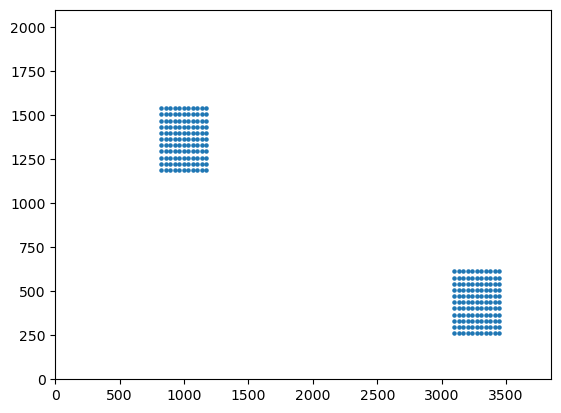

In [55]:
plt.scatter(mapping['x'], mapping['y'], 5)
plt.xlim(0, 17.5 * 220)
plt.ylim(0, 17.5 * 120)

In [56]:
# display(binned_data)


In [57]:
config_a = get_config_channels(data_path + config_a_file_name)
config_b = get_config_channels(data_path + config_b_file_name)
len(config_b)

2/219

0.0091324200913242

In [58]:
binned_data_a = binned_data.loc[:, config_a]
binned_data_b = binned_data.loc[:, config_b]

In [59]:
events = mla.load_events(data_path + h5_file_name, well_no = well)
events

,frameno,eventtype,eventid,eventmessage,frameno_adjusted,time,eventmessage_decoded
0,98351457,1,3,"b'{""closed_loop_start"":""0""}\n'",101351,5.06755,"{""closed_loop_start"":""0""}\n"
1,98451440,1,102,"b'{""amp_mV"":""15"",""dac"":""1"",""num_trains"":""1"",""p...",201334,10.06670,"{""amp_mV"":""15"",""dac"":""1"",""num_trains"":""1"",""pha..."
2,98451448,1,103,"b'{""amp_mV"":""15"",""dac"":""1"",""end_stimulation"":""...",201342,10.06710,"{""amp_mV"":""15"",""dac"":""1"",""end_stimulation"":""B""..."
3,98452450,1,6,"b'{""B"":""pressed""}\n'",202344,10.11720,"{""B"":""pressed""}\n"
4,98551418,1,100,"b'{""amp_mV"":""15"",""dac"":""2"",""num_trains"":""1"",""p...",301312,15.06560,"{""amp_mV"":""15"",""dac"":""2"",""num_trains"":""1"",""pha..."
5,98551426,1,101,"b'{""amp_mV"":""15"",""dac"":""2"",""end_stimulation"":""...",301320,15.06600,"{""amp_mV"":""15"",""dac"":""2"",""end_stimulation"":""A""..."
6,98552433,1,5,"b'{""A"":""pressed""}\n'",302327,15.11635,"{""A"":""pressed""}\n"
7,98651402,1,102,"b'{""amp_mV"":""15"",""dac"":""1"",""num_trains"":""1"",""p...",401296,20.06480,"{""amp_mV"":""15"",""dac"":""1"",""num_trains"":""1"",""pha..."
8,98651410,1,103,"b'{""amp_mV"":""15"",""dac"":""1"",""end_stimulation"":""...",401304,20.06520,"{""amp_mV"":""15"",""dac"":""1"",""end_stimulation"":""B""..."
9,98652410,1,6,"b'{""B"":""pressed""}\n'",402304,20.11520,"{""B"":""pressed""}\n"


In [60]:
a_pressed = events.loc[events["eventid"] == 5, "time"]
b_pressed = events.loc[events["eventid"] == 6, "time"]
experiment_start = events.loc[events["eventid"] == 3, "frameno_adjusted"]
a_pressed_frames = events.loc[events["eventid"] == 5, ["frameno_adjusted", "time"]]
experiment_start

0    101351
Name: frameno_adjusted, dtype: int64

In [61]:
def get_csv_frame(time):
    return time * 10000 - experiment_start

def get_graph_time(frame):
    return (frame + experiment_start) / 10000

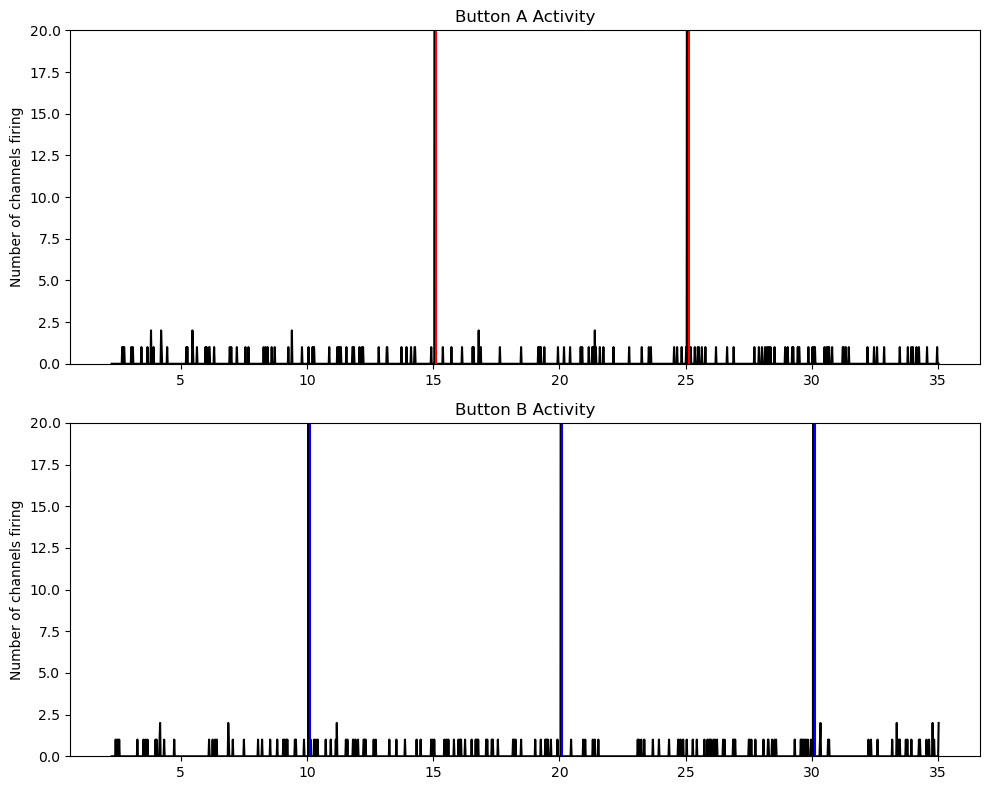

In [62]:




def plot_buttons(xlims, ylims):
    plt.figure(figsize = (10, 8))
    ax1 = plt.subplot(211)
    plt.title("Button A Activity")
    plt.plot(times, binned_data_a.sum(axis = 1), label = "Button A", color = "black")
    plt.ylabel("Number of channels firing")
    ax1.set_ylim(y_lims)
    if x_lims != []:
        ax1.set_xlim(x_lims)
    for p in a_pressed:
        ax1.axvline(p, color = a_color)
    ax2 = plt.subplot(212, sharex = ax1)


    plt.title("Button B Activity")
    plt.ylabel("Number of channels firing")
    # /len(binned_data_b.columns) /len(binned_data_a.columns)
    plt.plot(times, binned_data_b.sum(axis = 1), label = "Button B", color = "black")
    ax2.set_ylim(y_lims)
    if x_lims != []:
        ax2.set_xlim(x_lims)
    for p in b_pressed:
        ax2.axvline(p, color = b_color)

    # plt.subplot(313, sharex = ax1)
    # plt.title("Closed-loop Detection")
    # plt.scatter(a_pressed, [0] * len(a_pressed), color = a_color, label = "Button A pressed")
    # plt.scatter(b_pressed, [0] * len(b_pressed), color = b_color, label = "Button B pressed")
    # plt.legend()
    # plt.xlabel("Time (s)")


    plt.tight_layout()

# Areas to look at

# trial 7
# t=12:14, Button B

# trial 8
# t=31.25:31.75, Button A

# A threshold: 0.363067
# B threshold: -0.5

y_lims = [0, 20]
x_lims = []
plot_buttons(x_lims, y_lims)

In [63]:
get_csv_frame(83)

0    728649
Name: frameno_adjusted, dtype: int64

In [64]:
# choose random electrodes (50 each)
randchoice = np.random.choice(mapping['channel'], size = 100, replace = False)

buttonA = randchoice[0: len(randchoice) // 2]
buttonB = randchoice[len(randchoice) // 2: len(randchoice)]

print(buttonA)
print(buttonB)

[ 749  854  121  546  774  766  541  721  566  405  769  385  837  625
  906  457  526  657  165  934  765  650  610  513  726  789  117  533
 1022  746  698  525  773  790  685  734  545  597  778  669  870  637
  393  629  818  820  718  605  649  809]
[745 397 825 846 862 733 461 421 638 662 149 838 806 822 892 233 585 702
 622 834 389 529 710 249 618 425 705 693 742 153 982 762 578  34 265 181
 129 677 978 589 805 594 898 569 950 697 237 537 757 177]


In [65]:
def get_coords_slice(df, button):
    return df.loc[(np.isin(df["channel"], button)), ["x", "y"]]

0      3377.5
5      3272.5
6      3237.5
7      3447.5
8      3447.5
        ...  
189    3202.5
192    3202.5
194    3167.5
200    3132.5
204    3097.5
Name: x, Length: 121, dtype: float64

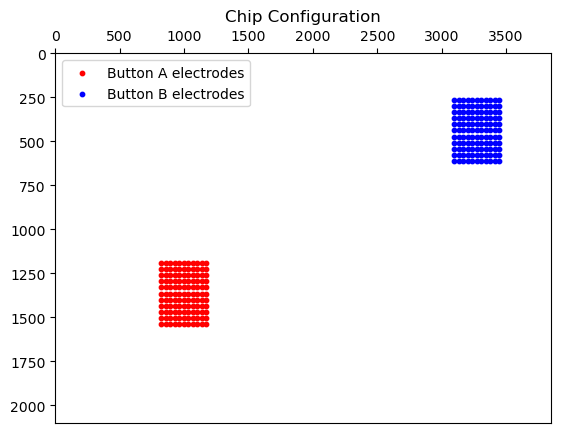

In [66]:

a_slice = get_coords_slice(mapping, config_a)
b_slice = get_coords_slice(mapping, config_b)

plt.xlim(0, 17.5 * 220)
plt.ylim(0, 17.5 * 120)
plt.scatter(a_slice['x'], a_slice['y'], 10, color=a_color, label="Button A electrodes")
plt.gca().invert_yaxis()
plt.scatter(b_slice['x'], b_slice['y'], 10, color=b_color, label="Button B electrodes")
plt.gca().tick_params(top=True, labeltop=True, labelbottom=False, bottom=False)
plt.title("Chip Configuration")
plt.legend()

b_slice['x']